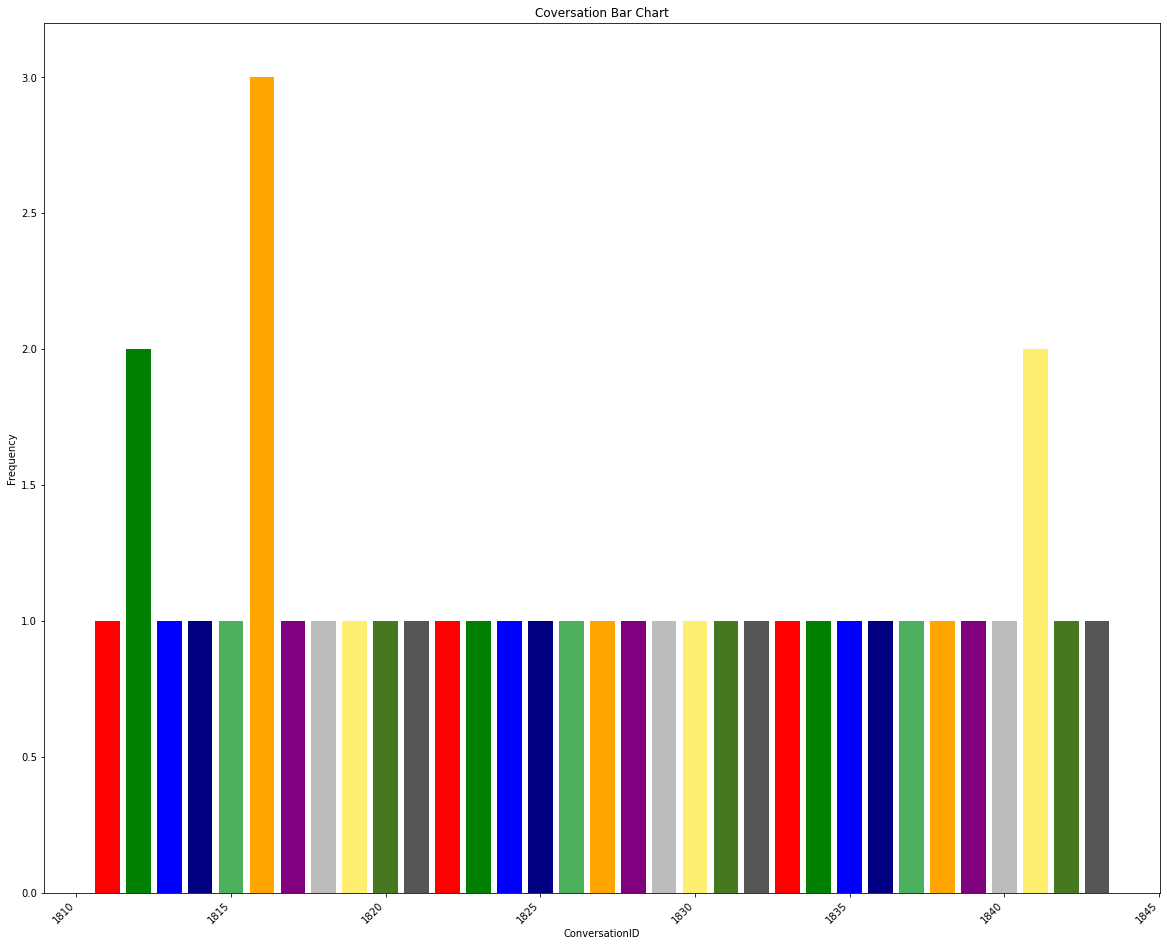

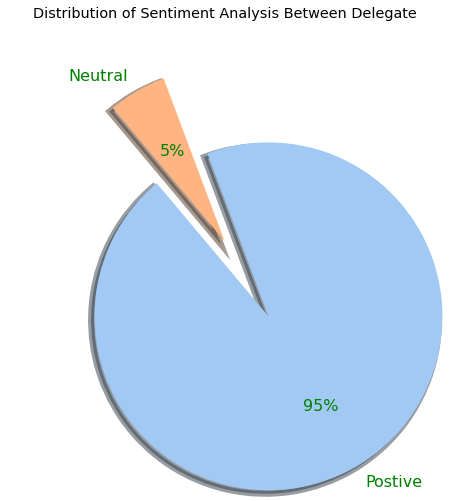

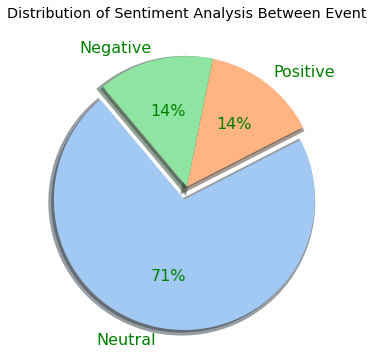

In [1]:
"""
     
            Identify the usage of messaging and networking functionality if it was able to 

        Note: You are required to have preinstalled the needed third party libraries as stated in the documentation
""" 
#LIbraries importation
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as pltNew
from collections import Counter
from matplotlib.gridspec import GridSpec
%matplotlib inline
import pandas as pd 
import numpy as np 
import csv 
import re 
import string 
import glob 
import random 
import requests 
from PIL import Image 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words 
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging
from textblob import TextBlob # TextBlob - Python library for processing textual data
from IPython.display import display, HTML

#-----------Database connection------------#
db = mysql.connector.connect(host ="localhost", 
                             user="root", 
                             passwd="password" , 
                             db = 'BookMeIn2',
                             auth_plugin='mysql_native_password')
mycursor= db.cursor()

#------display header/title ----------#
display(HTML("<h1 style='color:red;text-align:center; font-size:40px;'>Question 7</h1><h3 style='color:blue;text-align:center; font-size:25px;'>How were messaging and networking functions used?</h5>"))
display(HTML("""<p> There were 2 different tables containing messages during the event. The first was the conversation_message table. This contained the session chat messages shown in Question 6, 
as well as 'event' messages between staff within an exhibitor and 'delegate' messages, which could be sent between delegates to allow them to 'network'. 
<br>The delegate messaging feature was primarily used by exhibitors using delegate accounts, or other delegates who used this messaging platform to advertise their companies’ to the attendees. 
The majority of messages sent were from the delegates and there was little-to-no interaction from the attendees.<br>
Meanwhile, the 'event' conversations were used by exhbitors to communicate with one another about topics such as checking the messaging functions and their plans for when to close the stand.

<br><br>Within the exhbitor_message table, it was possible to view the conversations between exhbitors and delegates. A lot of the messages were just in regard to visiting the stands, 
however there were some 'test' messages exchanged between the delegates just to ensure that the messages were being sent and delivered. 
</p>"""))

#Selecting message from our database conversation table
text = pd.read_sql_query('SELECT message FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid WHERE keytype = "delegate"', db)
text1 = pd.read_sql_query('SELECT message FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid WHERE keytype = "event"', db)

#Select all  columns in conversation table for plotting
data = pd.read_sql_query('SELECt A.id, COUNT(A.id) as session FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid WHERE keytype = "delegate" GROUP BY  A.id; ', db)

data2 = pd.read_sql_query('SELECt A.id, COUNT(A.id) as session FROM conversation A CROSS JOIN conversation_message B ON A.id = B.conversationid WHERE keytype = "event" GROUP BY  A.id; ', db)

#plot bar chat using
plt.figure(figsize=(20,16))
plt.bar(data['id'], data['session'], color=['r','g','blue','navy', '#4CAF5c', 'orange','purple', '#bcbcbc', '#ffed6f','#467821'
                                           ,'#555555'])
plt.ylim(0, 3.2)
plt.xlabel("ConversationID")
plt.ylabel("Frequency")
plt.title("Coversation Bar Chart")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right' )
plt.show()

#Chart 1:
display(HTML("<p>Chart 1: Bar chart showing the number of messages sent in delegate conversations. It can be witnessed that for most conversations, only one message was sent, and therefore the message was not answered.</p>"))

def preprocessmessage(text):
    message = message.lower()  
   
    message = re.sub(r"http\S+|www\S+|https\S+", '', message, flags=re.MULTILINE)
    message = re.sub(r'\@\w+|\#|\d+', '', message)
    # Remove stopwords
    message_tokens = word_tokenize(message)  # convert string to tokens
    filtered_words = [w for w in message_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them
#setimental analysis of polarity and subjectivity
text_blob_object = TextBlob(text['message'][0])

# Create function to obtain Polarity Score
def find_pol(text):
    return TextBlob(text).sentiment.polarity

text['Sentiment_Polarity'] = text['message'].apply(find_pol)

# Create function to obtain Subjectivity Score
def getSubjectivity(message):
    return TextBlob(message).sentiment.subjectivity
# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity < 0.045:
        return "Neutral"
    else:
        return "Positive"

# Create function to obtain Sentiment values
def SentimentValues(Sentiment):
    if Sentiment == "Negative":
        return -1
    elif Sentiment == "Positive":
        return 1
    elif Sentiment == "Neutral":
        return 0
    #Subjectivity, Polarity and Sentiment values for plotting delegate
text['Subjectivity'] = text['message'].apply(getSubjectivity)
text['Polarity'] = text['message'].apply(find_pol)
text['Sentiment']= text['Polarity'].apply(getSentimentTextBlob)
text.Sentiment.value_counts()
#Subjectivity, Polarity and Sentiment values for plotting delegate
text1['Subjectivity'] = text1['message'].apply(getSubjectivity)
text1['Polarity'] = text1['message'].apply(find_pol)
text1['Sentiment']= text1['Polarity'].apply(getSentimentTextBlob)

#plat pie chat using pie chart
data1 = text.Sentiment.value_counts()
labels = ['Postive', 'Neutral']
explode = [0.5,0.0]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:8]

#------------create pie chart ------------#
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%', explode = explode , shadow = 'True',
       startangle = 130,
       textprops = {'color': 'Green','fontsize':16},  wedgeprops = {'linewidth': 6})
plt.title("Distribution of Sentiment Analysis Between Delegate")
plt.show()
#Chart 3
display(HTML("<p>Chart 2: Pie Chart showing the percentage of positive, neutral and negative interactions which occurred within the 'event' conversations. A significant majority of 95% are seen to be positive, with no negative interactions found.</p>"))




df = pd.DataFrame(text.Sentiment.value_counts())


#------------create pie chart 2------------#
data2 = text1.Sentiment.value_counts()
labels = ['Neutral', 'Positive', 'Negative']
explode = [0.1,0.0, 0.0]

plt.figure(figsize=(10, 6))
plt.pie(data2, labels = labels, colors = colors, autopct='%.0f%%', explode = explode , shadow = 'True',
       startangle = 130,
       textprops = {'color': 'Green','fontsize':16},  wedgeprops = {'linewidth': 6})
plt.title("Distribution of Sentiment Analysis Between Event")
plt.show()
df

#Chart 3
display(HTML("<p>Chart 3: Pie Chart showing the percentage of positive, neutral and negative interactions which occurred within the 'event' conversations. A significant majority of 71% are seen to be neutral.</p>"))

#----------Footer Section for report generation navigation -----------------#
footer = "<div style='width:100%; text-align:center;'><a href='5-chat-sentiment-analysis.html' style='color:blue;'>Previous</a></div>"
display(HTML(footer))